<a href="https://colab.research.google.com/github/EpsilonGrp/m2_geniomhe_rna_project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM for prediction of epsilon angles of RNA


## Method Used : Keras

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.preprocessing import StandardScaler


## Load Dataset

In [10]:
# Upload the CSV file
#uploaded = files.upload()

# Assuming you uploaded 'training_with_classes_11_12.csv'
file_path = '/New_training1.csv'
df = pd.read_csv(file_path)

Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder to encode 'name'
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])

In [12]:
df.head(10)

,rank,A,C,G,U,name,epsilon,class
0,1,1,0,0,0,0,-99.4,10
1,2,1,0,0,0,0,-138.0,6
2,3,0,1,0,0,0,-150.0,4
3,4,0,0,1,0,0,-154.3,4
4,5,0,0,1,0,0,-151.4,4
5,6,0,0,1,0,0,-145.7,5
6,7,0,1,0,0,0,-155.8,3
7,8,0,0,1,0,0,-151.5,4
8,9,0,1,0,0,0,-157.1,3
9,10,1,0,0,0,0,-154.4,4


In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'class' is your target variable
target_variable = 'class'

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'class' column
df[target_variable] = label_encoder.fit_transform(df[target_variable])


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11862 entries, 0 to 11861
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rank     11862 non-null  int64  
 1   A        11862 non-null  int64  
 2   C        11862 non-null  int64  
 3   G        11862 non-null  int64  
 4   U        11862 non-null  int64  
 5   name     11862 non-null  int64  
 6   epsilon  11862 non-null  float64
 7   class    11862 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 741.5 KB
None


In [15]:
df['class'].isnull().sum()

0

In [16]:
# Check the updated DataFrame
df.head(100)

,rank,A,C,G,U,name,epsilon,class
0,1,1,0,0,0,0,-99.4,1
1,2,1,0,0,0,0,-138.0,8
2,3,0,1,0,0,0,-150.0,6
3,4,0,0,1,0,0,-154.3,6
4,5,0,0,1,0,0,-151.4,6
...,...,...,...,...,...,...,...,...
95,18,0,0,1,0,2,-128.7,10
96,19,0,0,1,0,2,-158.5,5
97,20,0,0,0,1,2,-148.3,6
98,21,0,1,0,0,2,-157.0,5


# Notes :

input = fasta, epsilon

output = class

final prediction = angles

In [17]:
input_features = ['A','C','G','U']
X = df[input_features].values

In [18]:
# Define n_features
n_features = len(input_features)

In [19]:
target_variable = 'class'
y = df[target_variable].values

# split a multivariate sequence into samples

In [20]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()

	for i in range(len(sequences)):
		# find the end of this subsequence
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequences)-1:
			break
		# combine input and output parts of the subsequence
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [21]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()

    for i in range(len(sequences)):
        # find the end of this subsequence
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequences)-1:
            break
        # combine input and output parts of the subsequence
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


# Split the dataset into train and test sets

In [22]:
# Assuming 'class' is your target variable
target_variable = 'class'
y = df[target_variable].values

# Reshape y to be 2D: (samples, features)
y = y.reshape(-1, 1)

# Data splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace non-numeric values in y_train with the mean of the column
for i in range(y_train.shape[1]):
    column = y_train[:, i]
    non_numeric_mask = ~np.isnan(pd.to_numeric(column, errors='coerce'))
    if non_numeric_mask.any():
        mean_value = pd.to_numeric(column, errors='coerce').mean()
        y_train[:, i] = np.nan_to_num(pd.to_numeric(column, errors='coerce'), nan=mean_value)

# Replace non-numeric values in y_test with the mean of the column
for i in range(y_test.shape[1]):
    column = y_test[:, i]
    non_numeric_mask = ~np.isnan(pd.to_numeric(column, errors='coerce'))
    if non_numeric_mask.any():
        mean_value = pd.to_numeric(column, errors='coerce').mean()
        y_test[:, i] = np.nan_to_num(pd.to_numeric(column, errors='coerce'), nan=mean_value)

## Creating the Model
** You can apply the different deep learning tools that allow to improve the results **

Built a LSTM model with 1 hidden layer.

Every LSTM layer should be accompanied by a Dropout layer. This layer will help to prevent overfitting.

1
2
1
2
25/25 [==============================] - 0s 2ms/step - loss: 0.0162
Scores mse 0.016152547672390938
25/25 [==============================] - 0s 2ms/step


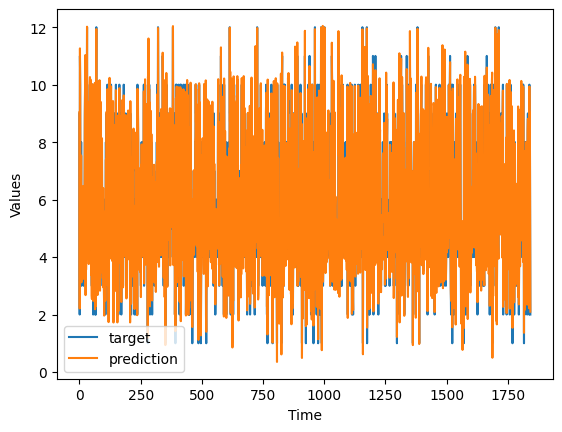

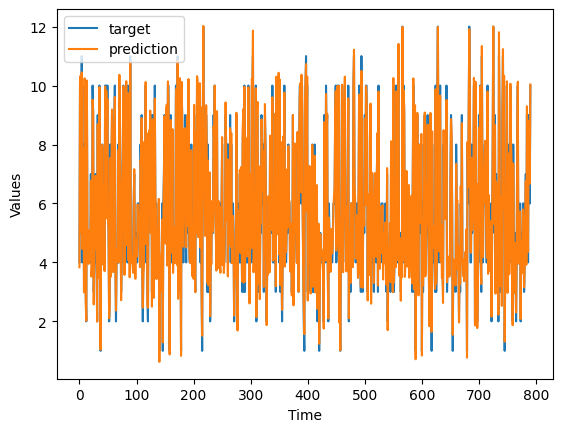

Mean Absolute Error (MAE) - Training Set: 0.26319393536608565


In [42]:

# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error

# Load Dataset
# Assuming 'class' is your target variable
target_variable = 'class'
df = pd.read_csv('/New_test1.csv')

# Preprocessing
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])

input_features = ['epsilon', 'name']
X = df[input_features].values

# Reshape y to be 2D: (samples, features)
y = df[target_variable].values
y = y.reshape(-1, 1)

# Convert 'Na' or other non-numeric values to NaN and then fill with mean
y_numeric = pd.to_numeric(y.flatten(), errors='coerce')
y_numeric = np.nan_to_num(y_numeric, nan=np.nanmean(y_numeric))

# Reshape back to 2D
y_numeric = y_numeric.reshape(-1, 1)

# Data splitting
x_train, x_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

# Standard Scaling for x_train and x_test
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

# Standard Scaling for y_train and y_test
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape x_train and x_test to be 3D: (samples, time_steps, features)
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

print(x_train_reshaped.shape[1])
print(x_train_reshaped.shape[2])

# Define the model
model = Sequential()
model.add(LSTM(100, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
print(x_train_reshaped.shape[1])
print(x_train_reshaped.shape[2])
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(x_train_reshaped, y_train_scaled, epochs=400, verbose=0)

# Evaluate the model on the test set
score = model.evaluate(x_test_reshaped, y_test_scaled, verbose=1)
print("Scores mse", score)

# Predictions
trainPredict_scaled = model.predict(x_train_reshaped)
testPredict_scaled = model.predict(x_test_reshaped)

# Inverse transform the predictions
trainPredict = scaler_y.inverse_transform(trainPredict_scaled)
testPredict = scaler_y.inverse_transform(testPredict_scaled)

# Plot baseline and predictions for the training set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_train.flatten(), label='target')
plt.plot(trainPredict.flatten(), label='prediction')
plt.legend()
plt.show()

# Plot baseline and predictions for the test set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_test.flatten(), label='target')
plt.plot(testPredict.flatten(), label='prediction')
plt.legend()
plt.show()

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train.flatten(), trainPredict.flatten())
print(f"Mean Absolute Error (MAE) - Training Set: {mae_train}")

# Calculate MAE for test set
mae_test = mean_absolute_error(y_test.flatten(), testPredict.flatten())

## Model Evaluation

## Results Visualisation

58/58 [==============================] - 0s 2ms/step


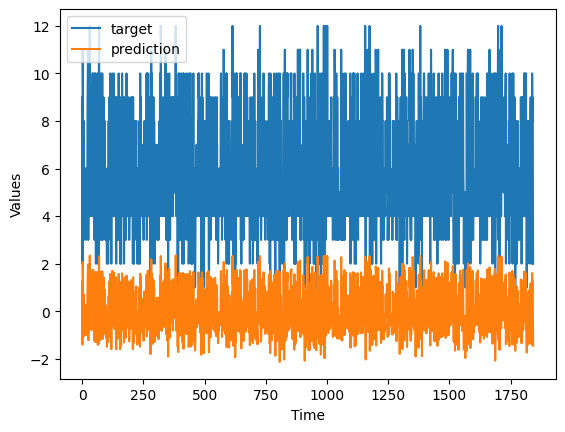

25/25 [==============================] - 0s 2ms/step


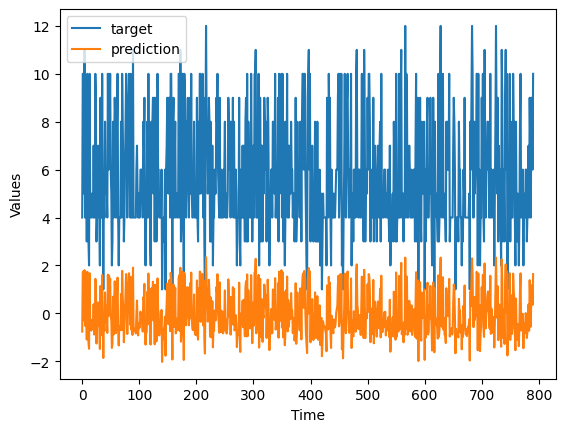

In [26]:
# Plot baseline and predictions for the training set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_train[:, 0], label='target')  # Change here
trainPredict = (model.predict(x_train_reshaped))[:, 0]  # Change here
plt.plot(trainPredict, label='prediction')
plt.legend()
plt.show()

# Plot baseline and predictions for the test set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_test[:, 0], label='target')  # Change here
testPredict = (model.predict(x_test_reshaped))[:, 0]  # Change here
plt.plot(testPredict, label='prediction')
plt.legend()
plt.show()


# Sample Test

In [41]:
# Get user input for sequence
sequence = input("Enter the sequence: ").upper()

# Convert the sequence string to a list of numeric codes
nucleotide_vector = list(sequence)

# Create a DataFrame
df2 = pd.DataFrame({'sequence': nucleotide_vector})

# One-hot encode nucleotides
df2['A'] = (df2['sequence'] == 'A').astype(int)
df2['C'] = (df2['sequence'] == 'C').astype(int)
df2['G'] = (df2['sequence'] == 'G').astype(int)
df2['U'] = (df2['sequence'] == 'U').astype(int)

# Rearrange columns
df2 = df2[['A', 'C', 'G', 'U']]

print(df2)
print(df2.shape)
print(df2.ndim)
print(df2.size)


#x_input = df2[['A', 'C', 'G', 'U']].values.reshape(1, len(df2), len(input_features))
x_input = df2[['A', 'C', 'G', 'U']].values.reshape(1, len(df2), 4)
x_input_scaled = scaler_x.transform(x_input.reshape(-1, len(input_features))).reshape(x_input.shape)

# Use the trained model to predict epsilon angles
predicted_angles_scaled = model.predict(x_input_scaled)

# Inverse transform the predicted angles
predicted_angles = scaler_y.inverse_transform(predicted_angles_scaled)

# Print the predicted angles
print("Predicted Epsilon Angles:")
print(predicted_angles)
'''
# Reshape the input sequence for prediction


# Standard Scaling for x_input
x_input_scaled = scaler_x.transform(x_input.reshape(-1, len(input_features))).reshape(x_input.shape)

# Use the trained model to predict epsilon angles
predicted_angles_scaled = model.predict(x_input_scaled)

# Inverse transform the predicted angles
predicted_angles = scaler_y.inverse_transform(predicted_angles_scaled)

# Print the predicted angles
print("Predicted Epsilon Angles:")
print(predicted_angles)

'''

Enter the sequence: AUU
   A  C  G  U
0  1  0  0  0
1  0  0  0  1
2  0  0  0  1
(3, 4)
2
12


InvalidArgumentError: Graph execution error:

Detected at node while/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-40-85787aa5de0f>", line 30, in <cell line: 30>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/base_rnn.py", line 556, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 749, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 1339, in lstm_with_backend_selection

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 981, in standard_lstm

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5168, in rnn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5147, in _step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 967, in step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 2463, in dot

Matrix size-incompatible: In[0]: [1,4], In[1]: [2,400]
	 [[{{node while/MatMul}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_78249]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Get user input for sequence
sequence = input("Enter the sequence: ").upper()

# Convert the sequence string to a list of numeric codes
nucleotide_vector = list(sequence)
rank = list(range(1, len(nucleotide_vector) + 1))

# Create a DataFrame
df2 = pd.DataFrame({'rank': rank, 'sequence': nucleotide_vector})

# One-hot encode nucleotides
df2['A'] = (df2['sequence'] == 'A').astype(int)
df2['C'] = (df2['sequence'] == 'C').astype(int)
df2['G'] = (df2['sequence'] == 'G').astype(int)
df2['U'] = (df2['sequence'] == 'U').astype(int)

# Rearrange columns
df2 = df2[['rank', 'A', 'C', 'G', 'U']]

# Display the DataFrame
df2

In [ ]:
# Reshape the input sequence to match the model's input shape
input_data = df2.values.reshape(1, df2.shape[1], 4)

# Repeat the sequence along the time dimension to match (None, 1, 2)
input_data = np.repeat(input_data, 2, axis=2)

# Make predictions
predictions = model.predict(input_data)

# Print the predicted values
print("Predicted Epsilon Angle:", predictions[0, 0])

print("Shape of input_data before reshaping:", input_data.shape)

print(df2.shape)
print(df2[['A', 'C', 'G', 'U']].values.shape)

In [ ]:
print("Shape of input_data before reshaping:", input_data.shape)


In [ ]:
print(df2.shape)
print(df2[['A', 'C', 'G', 'U']].values.shape)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 41301 (161.33 KB)
Trainable params: 41301 (161.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
